# Оптимизируем

In [54]:
import math as mt
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.pyplot import plot
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

%matplotlib inline

In [55]:
def coursera_answer(filename, string):
    with open(filename, "w+", newline=None) as file:
        file.write(string)
    print("# " + string)

## Задача 1. Минимизация гладкой функции

> Рассмотрим все ту же функцию из задания по линейной алгебре: `f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)`, но теперь уже на промежутке [1, 30]

> В первом задании будем искать минимум этой функции на заданном промежутке с помощью `scipy.optimize`. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а `f(x)` мы рассмотрим как удобный учебный пример.

> Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
Изучите примеры использования `scipy.optimize.minimize` в документации `Scipy` (см. "Материалы")

> Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [56]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

res1 = minimize(f, 1).x
res2 = minimize(f, 5).x
res3 = minimize(f, -10).x
res4 = minimize(f, 10).x
print(res1, res2, res3, res4)

[ 4.13628814] [ 4.13628831] [ 277.20759515] [ 5.81497192]


> Укажите в `scipy.optimize.minimize` в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения `x=2`. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

> Теперь измените начальное приближение на `x=30`. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

> Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с `Numpy`, `Scipy` и `Matplotlib`), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [57]:
res1 = minimize(f, 2, method="BFGS")
res2 = minimize(f, 30, method="BFGS")
print(res1.x, res2.x)
coursera_answer("ans11.txt", "%.2f %.2f" % (res1.fun, res2.fun))

[ 4.13627619] [ 25.88019358]
# 1.75 -11.90


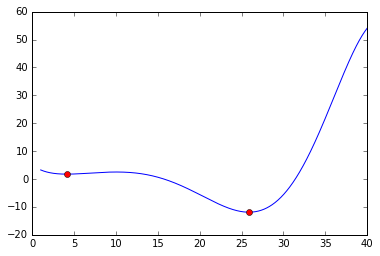

In [58]:
X = np.linspace(1, 40, 1000)
y = f(X)
plot(X, y)
plot([res1.x, res2.x], [res1.fun, res2.fun], "ro")

## Задача 2: глобальная оптимизация

> Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.

> Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

>Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

>Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

>Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [59]:
bounds = [[1, 30]]
res_evo = differential_evolution(f, bounds)
coursera_answer("ans12.txt", "%.2f" % res_evo.fun)

# -11.90


## Задача 3. Минимизация негладкой функции

> Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

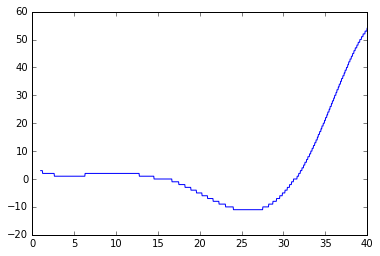

In [60]:
def h(x):
    return np.int32(f(x))
X = np.linspace(1, 40, 1000)
y = h(X)
plot(X, y)

> Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

> Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

> Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [61]:
res_db = minimize(h, 30, method="BFGS")
res_de = differential_evolution(h, [[1, 30]])
coursera_answer("ans13.txt", "%.2f %.2f" % (res_db.fun, res_de.fun))

# -5.00 -11.00
